<a href="https://colab.research.google.com/github/Raneem-Ali0/tock-price-prediction/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet
import plotly.io as pio
pio.renderers.defult='colab'

In [ ]:
df= pd.read_csv('data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,414.739109,425.323268,402.764717,415.137952,415.137952,6.178552e+07
std,234.908560,239.374833,229.101662,234.987820,234.987820,3.306128e+07
min,74.940002,80.972000,70.101997,72.244003,72.244003,1.515770e+07
25%,194.901001,199.384003,188.566994,193.368995,193.368995,3.628290e+07
50%,408.951996,418.700012,401.660004,408.500000,408.500000,5.561600e+07
75%,606.549988,627.795013,586.750000,607.234985,607.234985,8.131825e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,2.221262e+08


In [ ]:
px.area(df,x="Date",y="Close")

In [ ]:
px.area(df,x="Date",y="Volume")

In [ ]:
px.bar(df,y="Volume")

In [ ]:
px.box(df,y="Close")

In [ ]:
columns=["Date","Close"]
ndf=pd.DataFrame(df,columns=columns)

In [ ]:
prophet_df=ndf.rename(columns={"Date":"ds","Close":"y"})

In [ ]:
m = Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=30)
forecast= m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-16,65.592384,-29.228491,144.745742,65.592384,65.592384,-5.865511,-5.865511,-5.865511,-5.865511,-5.865511,-5.865511,0.0,0.0,0.0,59.726873
1,2020-03-17,67.387841,-21.143154,150.627456,67.387841,67.387841,-2.388676,-2.388676,-2.388676,-2.388676,-2.388676,-2.388676,0.0,0.0,0.0,64.999165
2,2020-03-18,69.183298,-19.195803,148.290851,69.183298,69.183298,-3.496043,-3.496043,-3.496043,-3.496043,-3.496043,-3.496043,0.0,0.0,0.0,65.687256
3,2020-03-19,70.978755,-18.156431,155.126179,70.978755,70.978755,-3.844838,-3.844838,-3.844838,-3.844838,-3.844838,-3.844838,0.0,0.0,0.0,67.133917
4,2020-03-20,72.774212,-18.804633,153.608495,72.774212,72.774212,-7.760562,-7.760562,-7.760562,-7.760562,-7.760562,-7.760562,0.0,0.0,0.0,65.013650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2021-04-07,900.261779,808.614518,983.733641,899.048591,901.440155,-3.496043,-3.496043,-3.496043,-3.496043,-3.496043,-3.496043,0.0,0.0,0.0,896.765737
277,2021-04-08,902.718796,818.326718,981.313699,901.460532,903.969342,-3.844838,-3.844838,-3.844838,-3.844838,-3.844838,-3.844838,0.0,0.0,0.0,898.873958
278,2021-04-09,905.175813,803.560531,980.543019,903.851884,906.518163,-7.760562,-7.760562,-7.760562,-7.760562,-7.760562,-7.760562,0.0,0.0,0.0,897.415251
279,2021-04-10,907.632829,834.347738,1004.900979,906.203501,909.041608,11.677815,11.677815,11.677815,11.677815,11.677815,11.677815,0.0,0.0,0.0,919.310644


In [ ]:
px.line(forecast,x='ds',y='yhat')

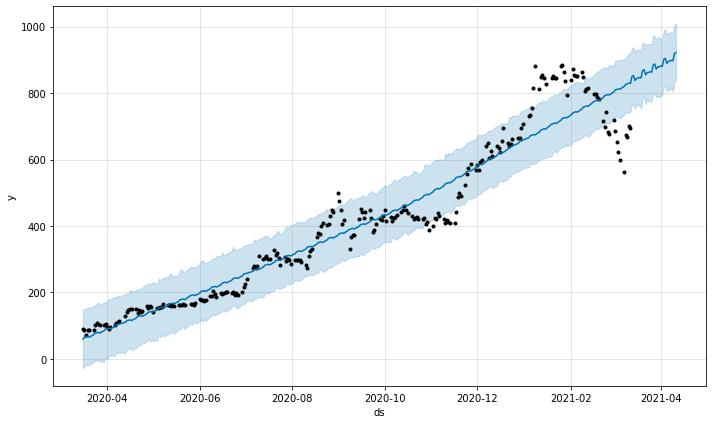

In [ ]:
figure=m.plot(forecast,xlabel='ds',ylabel='y')

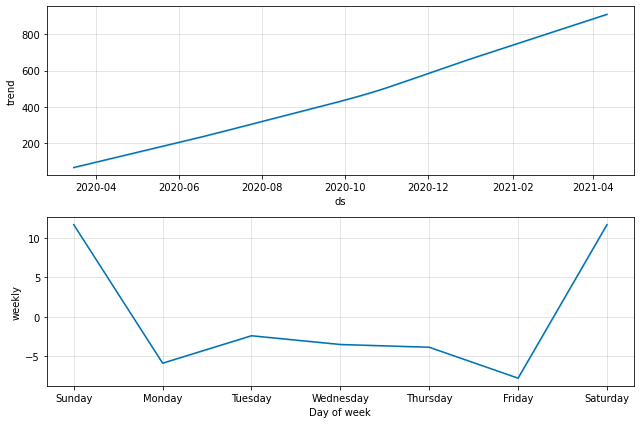

In [ ]:
figure2= m.plot_components(forecast)